# Quantium Virtual Internship - Retail Strategy and Analytics

## Overview
This project analyzes customer purchasing behavior using transaction and customer demographic data. 
The insights aim to enhance retail strategies by identifying trends, customer preferences, and areas for potential growth.


## Objectives
1. Clean and preprocess the data for accurate analysis.
2. Perform exploratory data analysis to uncover patterns in purchasing behavior.
3. Visualize key metrics and trends to support actionable business decisions.
4. Provide recommendations based on insights derived from the analysis.


In [4]:
## Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Set plot style
sns.set_theme(style="whitegrid")

In [12]:
# Defining File Paths 
file_path = "Desktop/Forage/QVI_purchase_behaviour.csv"
file_path= "Desktop/Forage/QVI_transaction_data.xlsx"

## Step 1: Load Datasets

In [13]:
# Load transaction and customer data
transaction_data = pd.read_excel("QVI_transaction_data.xlsx")
customer_data = pd.read_csv("QVI_purchase_behaviour.csv")

In [14]:
# Display basic information about the transaction data
print("Transaction Data Info:")
print(transaction_data.info())
print("\nTransaction Data Head:")
print(transaction_data.head())

Transaction Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None

Transaction Data Head:
    DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0  43390          1            1000       1         5   
1  43599          1            1307     348        66   
2  43605          1            1343     383        61   
3  43329          2            2373     974        69   
4  43330          2           

## Step 2: Data Preprocessing

In [15]:
# Convert Date Column
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'], origin='1899-12-30', unit='D')
print("\nConverted DATE column:")
print(transaction_data['DATE'].head())



Converted DATE column:
0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


In [16]:
# Examine Product Names
product_names = transaction_data['PROD_NAME'].unique()
product_words = pd.Series(" ".join(product_names).split()).value_counts()
print("\nMost Common Words in Product Names:")
print(product_words.head())



Most Common Words in Product Names:
175g      26
Chips     21
150g      19
&         17
Smiths    16
Name: count, dtype: int64


In [17]:
# Remove Salsa Products
transaction_data = transaction_data[~transaction_data['PROD_NAME'].str.contains("salsa", case=False)]


In [18]:
# Handle Outliers
outlier_transactions = transaction_data[transaction_data['PROD_QTY'] == 200]
print("\nOutlier Transactions:")
print(outlier_transactions)
outlier_customer = outlier_transactions['LYLTY_CARD_NBR'].iloc[0]
transaction_data = transaction_data[transaction_data['LYLTY_CARD_NBR'] != outlier_customer]



Outlier Transactions:
            DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
69762 2018-08-19        226          226000  226201         4   
69763 2019-05-20        226          226000  226210         4   

                              PROD_NAME  PROD_QTY  TOT_SALES  
69762  Dorito Corn Chp     Supreme 380g       200      650.0  
69763  Dorito Corn Chp     Supreme 380g       200      650.0  


In [19]:
# Check Missing Dates
date_range = pd.date_range(start="2018-07-01", end="2019-06-30")
transactions_by_date = transaction_data.groupby('DATE').size().reindex(date_range, fill_value=0)

## Step 3: Data Visualization

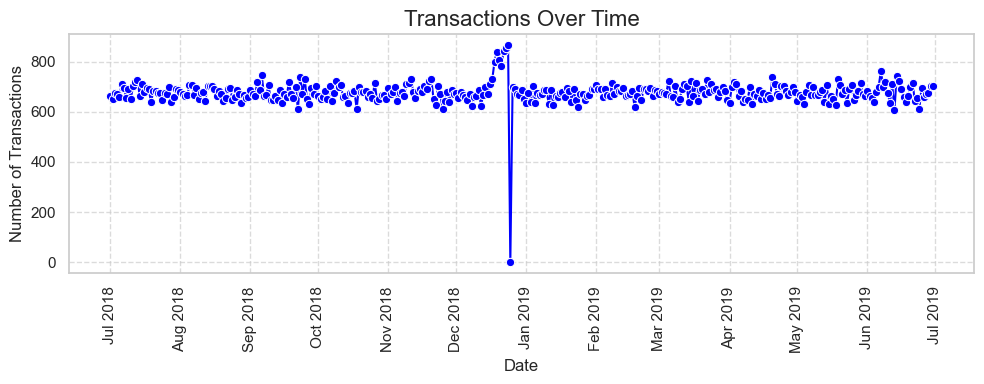

In [25]:
# Transactions Over Time
plt.figure(figsize=(10,4))
sns.lineplot(x=transactions_by_date.index, y=transactions_by_date.values, marker='o', color='blue')
plt.title("Transactions Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)

# Set x-axis formatting for dates
import matplotlib.dates as mdates
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(rotation=90)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
plt.savefig( "transactions_over_time.png")

plt.show()


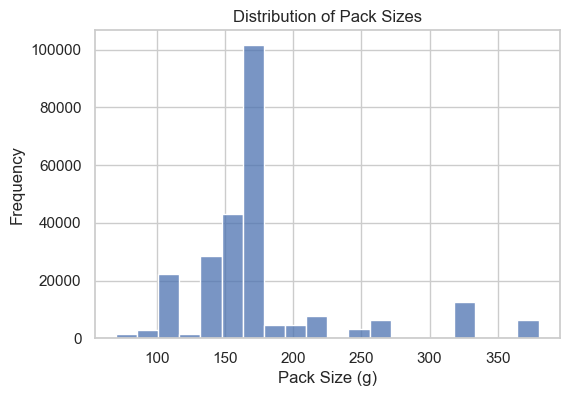

In [27]:
# Pack Size Distribution
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(float)
plt.figure(figsize=(6,4))
sns.histplot(transaction_data['PACK_SIZE'], bins=20, kde=False)
plt.title("Distribution of Pack Sizes")
plt.xlabel("Pack Size (g)")
plt.ylabel("Frequency")
plt.savefig( "pack_size_distribution.png")
plt.show()

In [28]:
# Brand Analysis
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.split().str[0]
transaction_data['BRAND'] = transaction_data['BRAND'].replace({'RED': 'RRD'})


## Step 4: Merge Datasets

In [29]:
# Merge transaction data with customer demographic data
data = pd.merge(transaction_data, customer_data, how='left', on='LYLTY_CARD_NBR')

In [30]:
# Check for missing customer details
missing_customers = data['LIFESTAGE'].isnull().sum()
print(f"\nNumber of Missing Customer Details: {missing_customers}")


Number of Missing Customer Details: 0


## Step 5: Analysis by Customer Segments

In [31]:
# Total Sales by Lifestage and Premium Customer
sales_by_segment = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

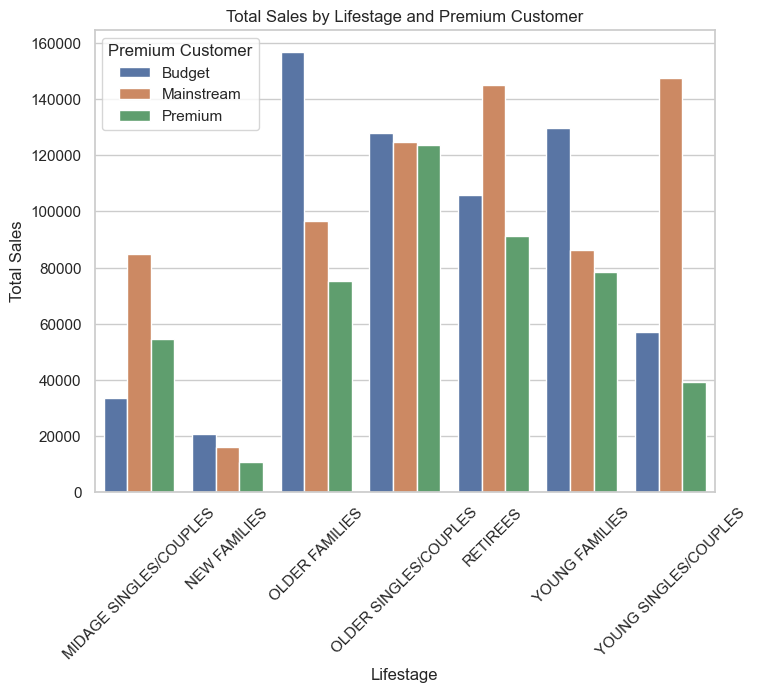

In [33]:
# Visualize Sales by Segment
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_segment, x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER')
plt.title("Total Sales by Lifestage and Premium Customer")
plt.xlabel("Lifestage")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend(title="Premium Customer")
plt.savefig( "sales_by_segment.png")
plt.show()

In [35]:
### T-Test for Price Comparison
mainstream_prices = data[(data['LIFESTAGE'] == 'Mainstream') & (data['PREMIUM_CUSTOMER'] == 'Yes')]['TOT_SALES']
budget_prices = data[(data['LIFESTAGE'] == 'Mainstream') & (data['PREMIUM_CUSTOMER'] == 'No')]['TOT_SALES']
t_stat, p_value = ttest_ind(mainstream_prices, budget_prices)
print(f"\nT-Test P-Value: {p_value}")

# Interpretation of T-Test Results
if p_value < 0.05:
    print("The difference in total sales between mainstream premium and non-premium customers is statistically significant.")
else:
    print("The difference in total sales between mainstream premium and non-premium customers is not statistically significant.")



T-Test P-Value: nan
The difference in total sales between mainstream premium and non-premium customers is not statistically significant.


## Step 6: Save Cleaned Data

In [37]:
# Save the cleaned dataset to a CSV file
data.to_csv("QVI_data_cleaned.csv", index=False)
print("\nCleaned Data Saved to QVI_data_cleaned.csv")


Cleaned Data Saved to QVI_data_cleaned.csv


## Insights and Recommendations
1. Mainstream premium customers exhibit higher total sales compared to their non-premium counterparts.
2. Seasonal trends are evident, indicating opportunities for targeted promotions.
3. Specific pack sizes and brands dominate the market, offering scope for inventory optimization.
